In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load CSV file
file_path = "/content/drive/My Drive/PCOS/PCOS_data.csv"
dataset = pd.read_csv(file_path)


Mounted at /content/drive


In [9]:
#dataset=pd.read_csv('/PCOS/PCOS_data.csv')
print(dataset.head())
print('')
print(dataset.shape)

   OutCome   Age   Weight   Height   BMI  Blood Group  Pulse rate  RR      Hb  \
0        0     28     44.6   152.0  19.3           15          78   22  10.48   
1        0     36     65.0   161.5  24.9           15          74   20  11.70   
2        1     33     68.8   165.0  25.3           11          72   18  11.80   
3        0     37     65.0   148.0  29.7           13          72   20  12.00   
4        0     25     52.0   161.0  20.1           11          72   18  10.00   

   Cycle  ...  Fast food  Reg.Exercise  BP _Systolic  BP _Diastolic   \
0      2  ...        1.0             0           110              80   
1      2  ...        0.0             0           120              70   
2      2  ...        1.0             0           120              80   
3      2  ...        0.0             0           120              70   
4      2  ...        0.0             0           120              80   

   Follicle No. (L) Follicle No. (R)  Avg. F size (L)   Avg. F size (R)   \
0   

In [10]:
data_load =dataset.drop(['Unnamed: 42'], axis=1)

In [11]:
x1=np.array(data_load.iloc[:,2:])
y=np.array(data_load.iloc[:,1])
print(x1.shape)
print(y.shape)

(541, 40)
(541,)


In [12]:
for colum in data_load.columns:
  print(colum)

OutCome
 Age 
Weight 
Height
BMI
Blood Group
Pulse rate
RR 
Hb
Cycle
Cycle length
Marraige Status 
Pregnant
abortions
  I   beta-HCG
II    beta-HCG
FSH
LH
FSH/LH
Hip
Waist
Waist:Hip Ratio
TSH 
AMH
PRL
Vit D3 
PRG
RBS
Weight gain
hair growth
Skin darkening 
Hair loss
Pimples
Fast food
Reg.Exercise
BP _Systolic
BP _Diastolic 
Follicle No. (L)
Follicle No. (R)
Avg. F size (L) 
Avg. F size (R) 
Endometrium


In [13]:
#droping the irrelevent columns
dummy=data_load.iloc[:,1:2]
dummy.shape

(541, 1)

In [14]:
#data=data.drop(['Sl. No','Patient File No.'], axis=1)
data=data_load.drop(dummy, axis=1)
data.shape

(541, 41)

In [15]:
data.describe()

,OutCome,Weight,Height,BMI,Blood Group,Pulse rate,RR,Hb,Cycle,Cycle length,...,Pimples,Fast food,Reg.Exercise,BP _Systolic,BP _Diastolic,Follicle No. (L),Follicle No. (R),Avg. F size (L),Avg. F size (R),Endometrium
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [16]:
#removing the unwanted data points
# data['AMH(ng/mL)'] = data['AMH(ng/mL)'].astype(float)
index = data[data['AMH'] == 'a'].index
# index = df[df['Character Name'] == 'Spellman'].index
data.drop(index, inplace=True)
#df['object_column'] = df['int_column'].astype(str).astype(int)

In [17]:
data['II    beta-HCG'] = data['II    beta-HCG'].replace('1.99.', '1.99')
data['II    beta-HCG']=data['II    beta-HCG'].astype(float)

In [18]:
data.dtypes

,0
OutCome,int64
Weight,float64
Height,float64
BMI,float64
Blood Group,int64
Pulse rate,int64
RR,int64
Hb,float64
Cycle,int64
Cycle length,int64


In [19]:
data['AMH'] = data['AMH'].astype(float)

In [20]:
data.info

<bound method DataFrame.info of      OutCome  Weight    Height   BMI  Blood Group  Pulse rate  RR      Hb  \
0          0     44.6  152.000  19.3           15          78   22  10.48   
1          0     65.0  161.500  24.9           15          74   20  11.70   
2          1     68.8  165.000  25.3           11          72   18  11.80   
3          0     65.0  148.000  29.7           13          72   20  12.00   
4          0     52.0  161.000  20.1           11          72   18  10.00   
..       ...      ...      ...   ...          ...         ...  ...    ...   
536        0     50.0  164.592  18.5           17          72   16  11.00   
537        0     63.2  158.000  25.3           15          72   18  10.80   
538        0     54.0  152.000  23.4           13          74   20  10.80   
539        0     50.0  150.000  22.2           15          74   20  12.00   
540        1     82.0  165.000  30.1           13          80   20  10.20   

     Cycle  Cycle length  ...  Pimples  Fast food  Reg.Exercise  BP _Systolic  \
0        2             5  ...        0        1.0             0           110   
1        2             5  ...        0        0.0             0           120   
2        2             5  ...        1        1.0             0           120   
3        2             5  ...        0        0.0             0           120   
4        2             5  ...        0        0.0             0           120   
..     ...           ...  ...      ...        ...           ...           ...   
536      2             5  ...        0        0.0             0           110   
537      2             5  ...        0        0.0             0           110   
538      2             6  ...        0        0.0             0           110   
539      4             2  ...        1        0.0             0           110   
540      4             7  ...        1        1.0             0           120   

     BP _Diastolic   Follicle No. (L)  Follicle No. (R)  Avg. F size (L)   \
0                80                 3                 3              18.0   
1                70                 3                 5              15.0   
2                80                13                15              18.0   
3                70                 2                 2              15.0   
4                80                 3                 4              16.0   
..              ...               ...               ...               ...   
536              70                 1                 0              17.5   
537              70                 9                 7              19.0   
538              80                 1                 0              18.0   
539              70                 7                 6              18.0   
540              70                 9                10              19.0   

     Avg. F size (R)   Endometrium  
0                18.0          8.5  
1                14.0          3.7  
2                20.0         10.0  
3                14.0          7.5  
4                14.0          7.0  
..                ...          ...  
536              10.0          6.7  
537              18.0          8.2  
538               9.0          7.3  
539              16.0         11.5  
540              18.0          6.9  

[540 rows x 41 columns]>

In [ ]:
data.isnull().sum()

OutCome             0
Weight              0
Height              0
BMI                 0
Blood Group         0
Pulse rate          0
RR                  0
Hb                  0
Cycle               0
Cycle length        0
Marraige Status     1
Pregnant            0
abortions           0
  I   beta-HCG      0
II    beta-HCG      0
FSH                 0
LH                  0
FSH/LH              0
Hip                 0
Waist               0
Waist:Hip Ratio     0
TSH                 0
AMH                 0
PRL                 0
Vit D3              0
PRG                 0
RBS                 0
Weight gain         0
hair growth         0
Skin darkening      0
Hair loss           0
Pimples             0
Fast food           1
Reg.Exercise        0
BP _Systolic        0
BP _Diastolic       0
Follicle No. (L)    0
Follicle No. (R)    0
Avg. F size (L)     0
Avg. F size (R)     0
Endometrium         0
dtype: int64

In [21]:
data=data.dropna()

In [22]:
data.corr()

,OutCome,Weight,Height,BMI,Blood Group,Pulse rate,RR,Hb,Cycle,Cycle length,...,Pimples,Fast food,Reg.Exercise,BP _Systolic,BP _Diastolic,Follicle No. (L),Follicle No. (R),Avg. F size (L),Avg. F size (R),Endometrium
OutCome,1.000000,0.209969,0.065465,0.198854,0.033701,0.092699,0.038641,0.087809,0.401837,-0.183811,...,0.290335,0.380985,0.071979,0.007923,0.033562,0.601208,0.650929,1.299969e-01,0.094528,0.107639
Weight,0.209969,1.000000,0.419808,0.901806,0.071354,0.020101,0.045339,0.009363,0.201575,-0.004452,...,0.064817,0.162872,-0.065109,0.028122,0.129210,0.171896,0.124669,-2.351731e-02,-0.075220,-0.009452
Height,0.065465,0.419808,1.000000,-0.006880,0.039409,-0.073608,-0.030492,0.025962,-0.021780,0.007573,...,0.064912,0.032853,0.015610,-0.068720,0.009094,0.102968,0.075560,-2.741536e-02,0.058357,-0.056273
BMI,0.198854,0.901806,-0.006880,1.000000,0.060550,0.050266,0.063902,0.002888,0.235623,-0.007982,...,0.044740,0.159935,-0.078480,0.070650,0.138603,0.142626,0.104735,-1.370214e-02,-0.113061,0.010980
Blood Group,0.033701,0.071354,0.039409,0.060550,1.000000,0.047865,-0.022707,-0.001652,0.123310,-0.008454,...,0.040382,-0.034770,0.067994,0.031264,0.051543,0.058719,0.014200,-3.759934e-02,-0.017517,-0.015257
Pulse rate,0.092699,0.020101,-0.073608,0.050266,0.047865,1.000000,0.305676,-0.052796,0.103416,0.006818,...,-0.004395,0.059712,-0.039055,-0.025021,0.007676,0.041534,0.049168,-4.867105e-02,-0.034141,-0.040456
RR,0.038641,0.045339,-0.030492,0.063902,-0.022707,0.305676,1.000000,-0.038693,0.012769,0.005754,...,0.032356,0.137533,-0.054183,0.013981,0.057322,0.069848,0.012856,-2.919643e-02,-0.020780,-0.066551
Hb,0.087809,0.009363,0.025962,0.002888,-0.001652,-0.052796,-0.038693,1.000000,0.040443,-0.052550,...,0.051089,0.077310,0.011980,0.053583,0.000475,0.062314,0.073459,3.087933e-02,0.023528,-0.063592
Cycle,0.401837,0.201575,-0.021780,0.235623,0.123310,0.103416,0.012769,0.040443,1.000000,-0.204673,...,0.129362,0.208929,-0.006537,0.051787,0.082659,0.293743,0.253369,3.437944e-02,0.015318,0.039612
Cycle length,-0.183811,-0.004452,0.007573,-0.007982,-0.008454,0.006818,0.005754,-0.052550,-0.204673,1.000000,...,-0.049372,-0.077174,0.029240,-0.013013,-0.078956,-0.092381,-0.160579,-5.678838e-02,-0.017618,-0.014630


In [23]:
x1=np.array(data.iloc[:,1:])
y=np.array(data.iloc[:,0])
print(x1.shape)
print(x1)
print(y.shape)
print(y)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=sc.fit_transform(x1)

(538, 40)
[[ 44.6 152.   19.3 ...  18.   18.    8.5]
 [ 65.  161.5  24.9 ...  15.   14.    3.7]
 [ 68.8 165.   25.3 ...  18.   20.   10. ]
 ...
 [ 54.  152.   23.4 ...  18.    9.    7.3]
 [ 50.  150.   22.2 ...  18.   16.   11.5]
 [ 82.  165.   30.1 ...  19.   18.    6.9]]
(538,)
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)

(403, 40)
(135, 40)


In [25]:
def initalize_params(x_train):
    w1=np.random.randn(5,x_train.shape[1])
    w2=np.random.randn(1,5)
    b1=np.random.randn(5,1)
    b2=np.random.randn(1,1)
    return w1,w2,b1,b2
def sigmoid_act(x):
  s=1/(1+np.exp(-x))
  return s

In [26]:
def forward_path(x,w1,b1,w2,b2):
  z1=np.reshape(np.matmul(w1,x.T),b1.shape)+b1
  A1=sigmoid_act(z1)
  z2=np.matmul(w2,A1)+b2
  A2=sigmoid_act(z2)
  return A2,A1

In [27]:
def compute_cost(y_pred,Y_true):
  cost=(Y_true*np.log(y_pred+(10**-7)))+((1-Y_true)*np.log(1-y_pred+(10**-7)))
  return -cost

In [28]:
def backward_path(A2,A1,w2,Y,x):
    dz2=(A2-Y)
    dw2=np.matmul(dz2,A1.T)
    db2=dz2.mean(axis=1)

    dA1=np.matmul(w2.T,dz2)
    dz1=np.multiply(dA1,(A1*(1-A1)))
    dw1=dz1*x
    db1=dz1.mean(axis=1)
    return dw2,dw1,db2,db1
def update_params(w,b,dw,db,learning_rate):
    w=w-learning_rate*dw
    db=np.reshape(db,b.shape)
    b=b-learning_rate*db
    return w,b

In [29]:
num_iters=750
learning_rate=0.001;
his1=[]
w1,w2,b1,b2=initalize_params(x_train)
for i in range(len(x_train)):
    cost=0
    for j in range(len(x_train)):
        A2,A1=forward_path(x_train[j],w1,b1,w2,b2)
        y_pred=A2
        cost += compute_cost(y_pred, y_train[j])
        dw2,dw1,db2,db1=backward_path(A2,A1,w2,y_train[j],x_train[j])
        w2,b2=update_params(w2,b2,dw2,db2,learning_rate)
        w1,b1=update_params(w1,b1,dw1,db1,learning_rate)
    his1.append((cost/len(x_train)))

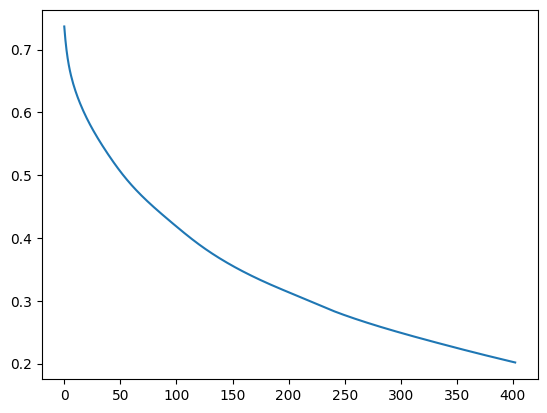

In [30]:
his=np.reshape(np.array(his1),len(his1))
plt.plot(his)
plt.show()

In [31]:
print(w1)
print(w1.shape)
print(b1)
print(b1.shape)
print(w2)
print(w2.shape)
print(b2)
print(b2.shape)

[[-2.80971393e-01  4.98994007e-01 -1.23361076e+00 -4.00166140e-01
   1.02903422e+00  3.13444183e-02 -4.38167449e-01  5.52256638e-01
  -1.23125819e+00  4.49174111e-01 -8.04305245e-01  2.05627597e+00
   2.81822323e-01 -7.96753095e-01 -1.28068331e-01 -8.27766757e-01
   9.96653115e-01  5.02816708e-01 -3.53591981e-01 -2.46896122e-01
   4.40507712e-03  9.85152647e-01 -1.94138015e-01  4.31529512e-02
   1.33492242e+00 -3.34763516e-01 -5.39192948e-01  8.79332922e-01
  -2.63939216e+00 -3.64082515e-01 -1.80024156e+00 -8.22440223e-01
  -5.63937802e-01 -1.41480451e+00  5.63593612e-01 -3.68351391e-01
  -2.11132952e+00 -2.26769865e-01 -2.63322256e-01  4.59611435e-01]
 [ 1.97828110e-01 -1.35469954e+00 -1.96706959e-01 -9.53509940e-01
  -1.92682631e+00 -1.27744716e+00 -9.70137062e-01  5.07279779e-01
  -3.33477948e-01 -1.30690274e+00  5.31689934e-01  1.39623422e+00
   3.15735970e-01 -4.31961577e-01  1.48233086e-01 -1.42651402e+00
   3.76215625e-01 -1.05782309e+00 -1.05885512e+00  2.78504861e-01
  -1.5580

In [32]:
y_pred=np.zeros(y_test.shape)

for i in range(len(x_test)):
    A2,A1=forward_path(x_test[i],w1,b1,w2,b2)
    A2=np.where(A2>0.5,1,0)
    y_pred[i]=A2

print(y_pred)
print(y_test)

[0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0]


<ipython-input-32-f63ecd937c5a>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i]=A2


In [33]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=np.array(confusion_matrix(y_test,y_pred,labels=[0,1]))
print(cm)
Confusion=pd.DataFrame(cm, index=['PCOS','No PCOS'], columns=['predicted PCOS', 'predicted NO PCOS'])
print(Confusion)
print(classification_report(y_test,y_pred,labels=[0,1]))
ACC=accuracy_score(y_test,y_pred)
print(ACC)

[[82  6]
 [15 32]]
         predicted PCOS  predicted NO PCOS
PCOS                 82                  6
No PCOS              15                 32
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        88
           1       0.84      0.68      0.75        47

    accuracy                           0.84       135
   macro avg       0.84      0.81      0.82       135
weighted avg       0.84      0.84      0.84       135

0.8444444444444444
